In [0]:
#Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
#Create some data
np.random.seed(0)
x = np.random.uniform(0,1,100) 
y = 1.2*x + 0.1*np.random.randn(x.shape[0])

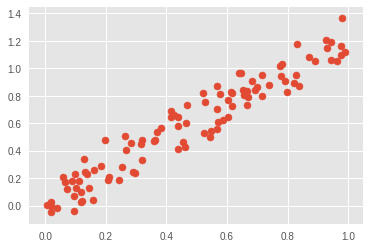

In [147]:
#Plot the data
plt.scatter(x, y);

In [0]:
#Reset the graph 
tf.reset_default_graph()

#Parameters
learning_rate = 0.01
batch_size = 10
n_epochs = 100

#Create placeholders
X = tf.placeholder(tf.float32, shape=[None, 1], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')
LEARNING_RATE = tf.placeholder(tf.float32, shape=[], name='LEARNING_RATE')
#Create variables
A = tf.get_variable('A', shape=[1], dtype=tf.float32, initializer=tf.random_normal_initializer())
B = tf.get_variable('B', shape=[1], dtype=tf.float32, initializer=tf.zeros_initializer())

#Create a linear model
y_pred = A*X + B

#Define a loss function
loss = tf.reduce_sum(tf.square(y_pred-Y), axis=0)

#Define an optimizer
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

In [0]:
def batch_generator(features, labels, batch_size):
  """Function to create python generator to shuffle and split features and labels into batches along the first dimension."""
  idx = np.arange(features.shape[0])
  np.random.shuffle(idx)
  for start_idx in range(0, features.shape[0], batch_size):
    end_idx = min(start_idx + batch_size, features.shape[0])
    part = idx[start_idx:end_idx]
    yield features[part], labels[part]

In [159]:
#Create a TF session:
saver = tf.train.Saver()
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(n_epochs):
    learning_rate = 0.1 - 0.05*((i+1)/n_epochs) #variable learning rate
    batch_size = np.int(2+20*((i+1)/n_epochs)) #variable batch size
    gen = batch_generator(x, y, batch_size) #create batch generator
    total_loss = 0
    for j in range(np.int(x.shape[0]/batch_size)):
      x_batch, y_batch = gen.__next__()
      x_batch, y_batch = x_batch[:, np.newaxis], y_batch[:, np.newaxis]
      _, batch_loss = sess.run([optimizer, loss], feed_dict={X: x_batch, Y: y_batch, LEARNING_RATE: learning_rate})
      total_loss += batch_loss
    if (i+1)% 10 == 0 or i == 0:
      print('Epoch: {0}, Loss: {1}'.format((i+1), total_loss))
    a, b = sess.run([A, B])
  save_path = saver.save(sess, "./tmp/linear.ckpt")
  print("Model saved in path: %s" % save_path)

Epoch: 1, Loss: [3.9511735]
Epoch: 10, Loss: [1.1477625]
Epoch: 20, Loss: [1.0226266]
Epoch: 30, Loss: [1.1828575]
Epoch: 40, Loss: [1.1779041]
Epoch: 50, Loss: [1.2187423]
Epoch: 60, Loss: [1.1227932]
Epoch: 70, Loss: [0.990875]
Epoch: 80, Loss: [0.9205338]
Epoch: 90, Loss: [1.1026571]
Epoch: 100, Loss: [0.89151335]
Model saved in path: ./tmp/linear.ckpt


[1.1886508] [0.03255336]


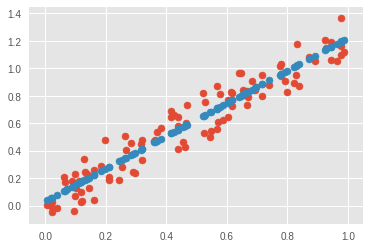

In [164]:
plt.scatter(x, y);
plt.scatter(x, a*x+b);
print(a, b)

In [165]:
tf.reset_default_graph()

# Create some variables.
A = tf.get_variable('A', shape=[1], dtype=tf.float32)
B = tf.get_variable('B', shape=[1], dtype=tf.float32)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "./tmp/linear.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("A : %s" % A.eval())
  print("B : %s" % B.eval())

INFO:tensorflow:Restoring parameters from ./tmp/linear.ckpt
Model restored.
A : [1.1886508]
B : [0.03255336]
